<a href="https://colab.research.google.com/github/FlintyTub49/Sem_V-Machine-Learning/blob/master/Exercise%208/Exercise%208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing The Packages

In [1]:
import numpy as np
import pandas as pd
import os

from bs4 import BeautifulSoup
import requests
import cv2
import PIL.Image
import urllib
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, Dropout, Activation
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

## WebScraping from ImageNet the images of Elephant

Indian Elephants - http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504013 <br>
African Elephants - http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504458 <br>
Tuskers - http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n01871265 <br>

In [3]:
def url_to_image(url):
  #Open the URL
	webpage = urllib.request.urlopen(url)
 
  #Read the image from the URL
	image = np.asarray(bytearray(webpage.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	return image

## Generalized Function for Getting Images and Storing them In a Directory

In [4]:
def get_images(url, n_train, n_valid, n_test, path1, path2, path3):

  #Getting the image links and splitting them after converting to sting
  page = requests.get(url)
  print(page.content)
  soup = BeautifulSoup(page.content, 'html.parser')
  str_soup = str(soup)

  urls = str_soup.split('\r\n')
  print('No. of URLs is:', len(urls))

  #Saving The Train Data
  i, count = 0, 0
  while 1:
    if count % 10 == 0: print('Train: ', count)

    if not urls[i] == None:
      try:
        img = url_to_image(urls[i])
        if (len(img.shape))==3:
          save_path = path1+str(count)+'.jpg'
          cv2.imwrite(save_path, img)
          count += 1
      except:
        None
    
    i += 1
    if count >= n_train: break
  
  #Saving The Valid Data
  j, count = i, 0 
  while 1:
    if count % 10 == 0: print('Valid: ', count)

    if not urls[j] == None:
      try:
        img = url_to_image(urls[j])
        if (len(img.shape))==3:
          save_path = path2+str(count)+'.jpg'
          cv2.imwrite(save_path, img)
          count += 1
      except:
        None
    
    j += 1
    if count >= n_valid: break

  #Saving The Test Data
  k, count = j, 0 
  while 1:
    if count % 10 == 0: print('Test: ', count)

    if not urls[k] == None:
      try:
        img = url_to_image(urls[k])
        if (len(img.shape))==3:
          save_path = path3+str(count)+'.jpg'
          cv2.imwrite(save_path, img)
          count += 1
      except:
        None
    
    k += 1
    if count >= n_test: break

## Make directories for the images

In [5]:
!mkdir /content/train
!mkdir /content/train/ind
!mkdir /content/train/afr
!mkdir /content/train/tusk

!mkdir /content/valid
!mkdir /content/valid/ind
!mkdir /content/valid/afr
!mkdir /content/valid/tusk

!mkdir /content/test
!mkdir /content/test/ind
!mkdir /content/test/afr
!mkdir /content/test/tusk

## Saving the Images In the Directories

### Indian Elephants

In [6]:
# Saving The Indian Elephant Images
ind = "http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504013"
ind_train = '/content/train/ind/ind_train'
ind_val = '/content/valid/ind/ind_val'
ind_test = '/content/test/ind/ind_test'
get_images(ind, 90, 30, 30, ind_train, ind_val, ind_test)

b"http://farm3.static.flickr.com/2394/2235169574_a573a0a0e1.jpg\r\nhttp://www.kohchang.se/elephanttrekking/elephas-maximus.jpg\r\nhttp://static.flickr.com/166/430524556_8d625a0c53.jpg\r\nhttp://farm1.static.flickr.com/34/65351417_9be3421342.jpg\r\nhttp://www.clementfrancis.com/mammalimages/elephant1_tn.jpg\r\nhttp://static.flickr.com/7/10556049_dbbb080a01.jpg\r\nhttp://content.answers.com/main/content/wp/en-commons/thumb/1/19/200px-Borneo-elephant-PLoS_Biology.jpg\r\nhttp://farm1.static.flickr.com/166/413202515_d7db2babf4.jpg\r\nhttp://farm1.static.flickr.com/36/117884234_911615dd80.jpg\r\nhttp://farm2.static.flickr.com/1345/1410282114_6cb715cd27.jpg\r\nhttp://beta.wwf.it/UserFiles/Image/wwfcanon/_animali/58714.jpg\r\nhttp://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Lightmatter_elephanttrunk.jpg/220px-Lightmatter_elephanttrunk.jpg\r\nhttp://static.flickr.com/98/385373846_76b82f230f.jpg\r\nhttp://farm1.static.flickr.com/118/297995324_906a19a127.jpg\r\nhttp://farm1.static.flickr.

### African Elephants

In [7]:
# Saving The African Elephant Images
afr = "http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504458"
afr_train = '/content/train/afr/afr_train'
afr_val = '/content/valid/afr/afr_val'
afr_test = '/content/test/afr/afr_test'
get_images(afr, 90, 30, 30, afr_train, afr_val, afr_test)

b"http://farm1.static.flickr.com/105/296581628_44650d2459.jpg\r\nhttp://farm1.static.flickr.com/76/155881333_9d7e131ae0.jpg\r\nhttp://farm3.static.flickr.com/2279/2104779529_6150d71359.jpg\r\nhttp://farm1.static.flickr.com/200/528406781_dbf9f35bc6.jpg\r\nhttp://static.flickr.com/1166/1022044420_8470e1dba4.jpg\r\nhttp://farm3.static.flickr.com/2164/2136965828_9ccecc5461.jpg\r\nhttp://farm2.static.flickr.com/1276/557914929_5fd3b8eda8.jpg\r\nhttp://farm3.static.flickr.com/2064/2044766644_d2c5fbf0ab.jpg\r\nhttp://www.biolib.cz/IMG/GAL/27218.jpg\r\nhttp://farm2.static.flickr.com/1185/526679603_0e9260f904.jpg\r\nhttp://www.meyers-naturfoto.de/bilder/elefant08.jpg\r\nhttp://farm1.static.flickr.com/176/439344604_4deac55c4d.jpg\r\nhttp://farm1.static.flickr.com/42/120699816_9d908f29aa.jpg\r\nhttp://farm1.static.flickr.com/72/212931942_94a360269d.jpg\r\nhttp://farm3.static.flickr.com/2400/2048284166_ea8b1cea22.jpg\r\nhttp://farm2.static.flickr.com/1207/997600165_5453a73a16.jpg\r\nhttp://www.orus

### Tuskers

In [8]:
# Saving Elephant Images with Tuskers
tusk = "http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n01871265"
tusk_train = '/content/train/tusk/tusk_train'
tusk_val = '/content/valid/tusk/tusk_val'
tusk_test = '/content/test/tusk/tusk_test'
get_images(tusk, 90, 30, 30, tusk_train, tusk_val, tusk_test)

b'http://farm1.static.flickr.com/159/414792641_5ff1ab1582.jpg\r\nhttp://static.flickr.com/92/229750451_82302cdf63.jpg\r\nhttp://ianlockwood.files.wordpress.com/2007/03/peraheratuskertracks_2lr2_07.jpg\r\nhttp://www.clementfrancis.com/mammalimages/elephant1_tn.jpg\r\nhttp://farm2.static.flickr.com/1094/890950932_4650abb8f6.jpg\r\nhttp://www.btinternet.com/~j.j.peirson/DAWN1b16.jpg\r\nhttp://farm1.static.flickr.com/138/381356986_6819268876.jpg\r\nhttp://farm1.static.flickr.com/95/230958807_7694968936.jpg\r\nhttp://www.rsp-photos.com/photos/12937c.jpg\r\nhttp://static.flickr.com/212/510656544_933215ec3f.jpg\r\nhttp://www.gdtphoto.com/pics/elephant/slides/Old%20Tusker.jpg\r\nhttp://farm1.static.flickr.com/85/231454426_1f8f5b6706.jpg\r\nhttp://static.flickr.com/58/229061136_bda26507e7.jpg\r\nhttp://farm2.static.flickr.com/1286/756074271_303ffa32b6.jpg\r\nhttp://farm1.static.flickr.com/36/114169842_eb30bbcaf9.jpg\r\nhttp://www.yvonnevandermey.nl/images/elephant%20big%20tusker%20Duke-crossing

## Data Augmentation To Increase Data Size

In [9]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, rotation_range = 60, vertical_flip = True, 
                                   horizontal_flip = True, width_shift_range = 0.2, height_shift_range = 0.2, 
                                   fill_mode = 'nearest', zoom_range = 0.1)

val_datagen = ImageDataGenerator(rescale = 1.0/255, rotation_range = 60, vertical_flip = True, 
                                   horizontal_flip = True, width_shift_range = 0.2, height_shift_range = 0.2, 
                                   fill_mode = 'nearest', zoom_range = 0.1)

test_datagen = ImageDataGenerator(rescale = 1.0/255)

train = train_datagen.flow_from_directory(directory = '/content/train/', target_size = (150, 150), 
                                          class_mode = 'categorical', shuffle = True, color_mode = 'rgb', batch_size = 5)

valid = val_datagen.flow_from_directory(directory = '/content/valid/', target_size = (150, 150), 
                                          class_mode = 'categorical', shuffle = True, color_mode = 'rgb', batch_size = 5)

test = test_datagen.flow_from_directory(directory = '/content/test/', target_size = (150, 150), 
                                        class_mode = 'categorical', shuffle = True, color_mode = 'rgb', batch_size = 5)

Found 270 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


## Model Building

In [11]:
model = Sequential()

'''First Layer - 1024 Units'''
model.add(Conv2D(270, (150,150), input_shape= (150, 150, 3), kernel_initializer="glorot_normal", bias_initializer="glorot_normal", 
                 activation = 'relu'))
# model.add(Conv2D(8, kernel_size = (150, 150), activation = 'relu'))
# padding="valid", 
model.add(Flatten())
#model.add(BatchNormalization())
# model.add(Dropout(0.3))

'''Second Layer - 512 Units'''
model.add(Dense(units = 256, kernel_initializer="glorot_normal", bias_initializer="glorot_normal"))
model.add(keras.layers.LeakyReLU(alpha = 0.01))
#model.add(BatchNormalization())
# model.add(Dropout(0.2))

'''Third Layer - 256 Units'''
# model.add(Dense(units = 256, activation = 'relu', kernel_initializer="glorot_normal", bias_initializer="glorot_normal"))
# model.add(keras.layers.LeakyReLU(alpha = 0.01))

'''Fourth Layer - 128 Units'''
# model.add(Dense(units = 256, activation = 'relu', kernel_initializer="glorot_normal", bias_initializer="glorot_normal"))

'''Output Layer - 3 Units'''
model.add(Dense(units = 3, activation = 'softmax', kernel_initializer = "glorot_normal", bias_initializer = "glorot_normal"))

'''Compiling Final Model'''
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 1, 270)         18225270  
_________________________________________________________________
flatten (Flatten)            (None, 270)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               69376     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 18,295,417
Trainable params: 18,295,417
Non-trainable params: 0
_________________________________________________________________


## Saving The Best Model To Be Used Later

In [12]:
filepath = "weights-best.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20, min_delta = 0.25, baseline=0.9)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=2, factor=0.1, min_lr=0.00001)

history = model.fit(train, epochs=100, callbacks=[checkpoint, es], steps_per_epoch = 54, validation_data = valid)

Epoch 1/100
54/54 [==============================] - ETA: 0s - loss: 1.8124 - accuracy: 0.3481
Epoch 00001: val_accuracy improved from -inf to 0.32222, saving model to weights-best.hdf5
54/54 [==============================] - 4s 74ms/step - loss: 1.8124 - accuracy: 0.3481 - val_loss: 1.1124 - val_accuracy: 0.3222
Epoch 2/100
54/54 [==============================] - ETA: 0s - loss: 1.1487 - accuracy: 0.3259
Epoch 00002: val_accuracy improved from 0.32222 to 0.33333, saving model to weights-best.hdf5
54/54 [==============================] - 4s 72ms/step - loss: 1.1487 - accuracy: 0.3259 - val_loss: 1.1527 - val_accuracy: 0.3333
Epoch 3/100
54/54 [==============================] - ETA: 0s - loss: 1.1443 - accuracy: 0.3000
Epoch 00003: val_accuracy did not improve from 0.33333
54/54 [==============================] - 4s 73ms/step - loss: 1.1443 - accuracy: 0.3000 - val_loss: 1.1352 - val_accuracy: 0.3333
Epoch 4/100
54/54 [==============================] - ETA: 0s - loss: 1.1343 - accurac

## Plotting the Accuracy and Loss

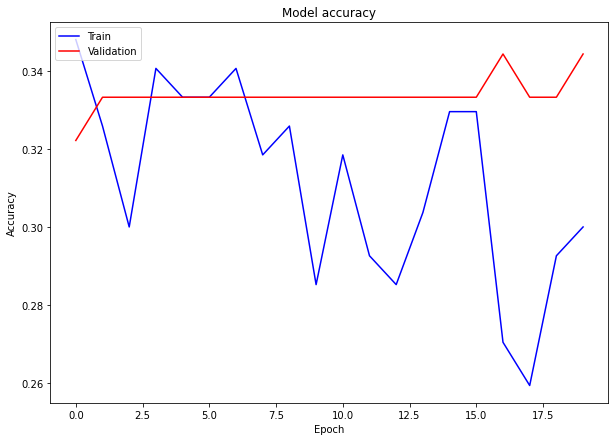

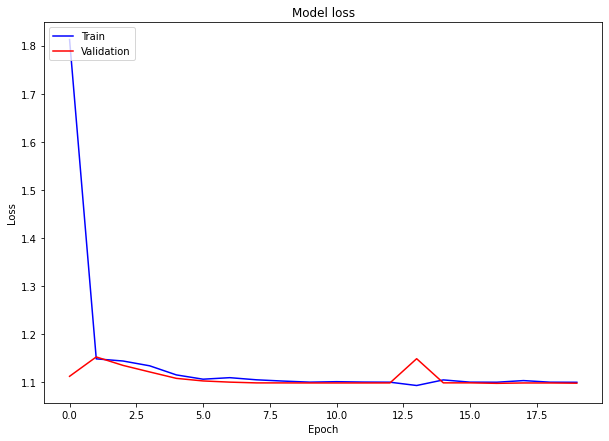

In [13]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
  
plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
#plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Using the Saved Model to check the Accuracy on the Test Set

In [14]:
best = load_model('weights-best.hdf5')
best.evaluate(test)[1]

18/18 [==============================] - 0s 26ms/step - loss: 1.0971 - accuracy: 0.3556


0.35555556416511536